In [1]:
import numpy as np
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import itertools
from tqdm import tqdm

In [2]:
"""Valid files txt file generated from 001 - unzip data.ipynb"""
VALID_FILES_PATH = Path('E:/Datasets/0-Processed_Datasets/2023-11-15_imu-vicon-data/valid_files.txt')

with open(VALID_FILES_PATH) as f:
    valid_files = f.readlines()
    valid_files = [x.strip() for x in valid_files]

In [3]:
mocap_files = [Path(f'E:/Datasets/0-Processed_Datasets/2023-11-15_imu-vicon-data/{file}_mocap.csv') for file in valid_files]
mocap_files

[WindowsPath('E:/Datasets/0-Processed_Datasets/2023-11-15_imu-vicon-data/S01/S01_E1_R_1_mocap.csv'),
 WindowsPath('E:/Datasets/0-Processed_Datasets/2023-11-15_imu-vicon-data/S01/S01_E1_R_2_mocap.csv'),
 WindowsPath('E:/Datasets/0-Processed_Datasets/2023-11-15_imu-vicon-data/S01/S01_E2_R_1_mocap.csv'),
 WindowsPath('E:/Datasets/0-Processed_Datasets/2023-11-15_imu-vicon-data/S01/S01_E2_R_2_mocap.csv'),
 WindowsPath('E:/Datasets/0-Processed_Datasets/2023-11-15_imu-vicon-data/S01/S01_E3_R_1_mocap.csv'),
 WindowsPath('E:/Datasets/0-Processed_Datasets/2023-11-15_imu-vicon-data/S01/S01_E3_R_2_mocap.csv'),
 WindowsPath('E:/Datasets/0-Processed_Datasets/2023-11-15_imu-vicon-data/S01/S01_E4_R_1_mocap.csv'),
 WindowsPath('E:/Datasets/0-Processed_Datasets/2023-11-15_imu-vicon-data/S01/S01_E4_R_2_mocap.csv'),
 WindowsPath('E:/Datasets/0-Processed_Datasets/2023-11-15_imu-vicon-data/S01/S01_E5_R_1_mocap.csv'),
 WindowsPath('E:/Datasets/0-Processed_Datasets/2023-11-15_imu-vicon-data/S01/S01_E5_R_2_moc

# Testing of coordinate transformation to shoulder frame of reference

In [4]:
fp = mocap_files[8]
fp

WindowsPath('E:/Datasets/0-Processed_Datasets/2023-11-15_imu-vicon-data/S01/S01_E5_R_1_mocap.csv')

In [5]:
df = df_mocap = pd.read_csv(fp, skiprows=2)
df

,Unnamed: 0,Unnamed: 1,S01_cal:C7,Unnamed: 3,Unnamed: 4,S01_cal:L5,Unnamed: 6,Unnamed: 7,S01_cal:SS,Unnamed: 9,...,S01_cal:L_FA3,Unnamed: 93,Unnamed: 94,S01_cal:L_MCP5,Unnamed: 96,Unnamed: 97,S01_cal:L_MCP2,Unnamed: 99,Unnamed: 100,Unnamed: 101
0,Frame,Sub Frame,X,Y,Z,X,Y,Z,X,Y,...,X,Y,Z,X,Y,Z,X,Y,Z,NaN
1,NaN,NaN,mm,mm,mm,mm,mm,mm,mm,mm,...,mm,mm,mm,mm,mm,mm,mm,mm,mm,NaN
2,1,0,207.471,252.42,1470.51,222.122,236.232,1016.93,220.827,401.464,...,-83.3774,409.075,910.465,-78.7036,478.71,774.909,-30.9023,544.578,800.377,NaN
3,2,0,207.499,252.602,1470.54,222.1,236.297,1016.95,220.807,401.626,...,-83.4673,408.91,910.465,-78.8628,478.505,774.879,-31.0824,544.417,800.324,NaN
4,3,0,207.493,252.751,1470.56,222.101,236.313,1017,220.817,401.813,...,-83.568,408.773,910.49,-78.9983,478.301,774.873,-31.2299,544.241,800.28,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3978,3977,0,224.66,232.486,1469.61,238.678,217.665,1014.45,246.9,377.581,...,-57.3704,403.924,910.198,-45.858,467.096,771.698,10.5911,527.237,794.168,NaN
3979,3978,0,224.852,232.365,1469.59,239.126,217.714,1014.4,247.483,377.416,...,-56.4966,404.842,910.244,-44.6528,468.187,771.856,11.9349,528.14,794.483,NaN
3980,3979,0,225.019,232.269,1469.55,239.572,217.768,1014.34,248.025,377.228,...,-55.5987,405.816,910.29,-43.455,469.351,771.999,13.3037,529.101,794.786,NaN
3981,3980,0,225.189,232.176,1469.51,240.058,217.825,1014.31,248.627,377.061,...,-54.6932,406.864,910.358,-42.2438,470.578,772.162,14.69,530.115,795.094,NaN


In [6]:
subject = "S01"
col_inds = []
markers = ["R_RS", "R_US", "R_ME", "R_LE", "R_ACR", "C7", "T8"]
for loc in markers:
    i = df.columns.tolist().index(f"{subject}_cal:{loc}")
    col_inds.extend([i, i+1, i+2])
subdf = df.iloc[2:, col_inds]
subdf.columns = [f"{loc}_{axis}" for loc, axis in itertools.product(markers, "XYZ")]
subdf = subdf.astype(float)
subdf

,R_RS_X,R_RS_Y,R_RS_Z,R_US_X,R_US_Y,R_US_Z,R_ME_X,R_ME_Y,R_ME_Z,R_LE_X,...,R_LE_Z,R_ACR_X,R_ACR_Y,R_ACR_Z,C7_X,C7_Y,C7_Z,T8_X,T8_Y,T8_Z
2,501.323,524.575,1149.90,506.644,531.334,1093.72,419.701,273.561,1062.82,508.089,...,1090.36,444.021,320.886,1406.30,207.471,252.420,1470.51,208.741,211.858,1213.56
3,503.631,523.665,1150.02,509.425,530.618,1094.03,419.278,273.657,1062.74,507.625,...,1090.26,444.033,320.834,1406.20,207.499,252.602,1470.54,208.738,211.924,1213.60
4,505.901,522.774,1150.29,512.143,529.885,1094.42,418.890,273.773,1062.60,507.196,...,1090.16,444.041,320.758,1406.09,207.493,252.751,1470.56,208.741,212.008,1213.61
5,508.137,521.945,1150.56,513.073,527.880,1094.93,418.513,273.868,1062.44,506.784,...,1090.03,444.042,320.678,1405.95,207.511,252.905,1470.58,208.731,212.071,1213.64
6,510.343,521.152,1150.75,515.148,527.014,1095.02,418.158,274.066,1062.25,506.370,...,1089.89,444.046,320.600,1405.80,207.522,253.061,1470.61,208.735,212.140,1213.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3978,306.973,549.609,1175.02,307.990,560.669,1119.25,458.124,341.363,1071.08,514.720,...,1110.76,453.421,305.726,1411.77,224.660,232.486,1469.61,224.592,190.868,1213.30
3979,311.060,550.924,1175.05,312.134,561.850,1119.24,458.283,339.824,1070.94,515.971,...,1110.44,453.993,304.797,1411.63,224.852,232.365,1469.59,224.854,190.835,1213.21
3980,315.235,552.023,1175.15,316.459,563.153,1119.37,458.495,338.369,1070.80,517.252,...,1110.23,454.551,303.693,1411.59,225.019,232.269,1469.55,225.135,190.801,1213.10
3981,319.721,553.688,1175.51,320.993,564.712,1119.67,458.712,336.926,1070.68,518.556,...,1109.93,455.091,302.637,1411.54,225.189,232.176,1469.51,225.412,190.791,1213.00


In [7]:
p_rs = subdf.iloc[2, [0, 1, 2]].values
p_us = subdf.iloc[2, [3, 4, 5]].values
p_me = subdf.iloc[2, [6, 7, 8]].values
p_le = subdf.iloc[2, [9, 10, 11]].values
p_acr = subdf.iloc[2, [12, 13, 14]].values
p_c7 = subdf.iloc[2, [15, 16, 17]].values
p_t8 = subdf.iloc[2, [18, 19, 20]].values

## Define transformation matrix of shoulder coordinate frame
$O_{ACR} = p_{acr}$

$p_{elb} = (p_{me} + p_{le})/2$

Want coordinate frame transformed to ACR origin:
- x -> anterior direction
- y -> along distal axis to midpoint of ME and LE
- z -> lateral direction(we choose along LE-ACR)

1) Find $\hat{u}$ and $\hat{v}$ where $\hat{u}$ and $\hat{v}$ are the unit vectors of ME to ACR and LE to ACR, respectively
2) Get $\hat z$ by crossing $\hat{u}$ and $\hat{v}$. Note cross is not a unit vector as $\hat{u}$ and $\hat{v}$ are not orthogonal
3) Choose one of the original vectors as the $\hat y$ (Can I use unit vector of ELB-ACR?)
4) Cross $\hat y$ and  $\hat z$ for $\hat x$ with RHR
5) Generate $^{lab} _{shoulder} R$
6) Generate $^{lab} _{shoulder} T$

Recall: 

$^{shoulder}P_{elb} = ^{shoulder} _{lab} T ^{lab}P_{elb}$,

$^{shoulder}P_{wrist} = ^{shoulder} _{lab} T ^{lab}P_{wrist}$

$\therefore ^{shoulder} _{lab} T = [^{lab} _{shoulder} T]^{-1}$


In [8]:
p_me, p_acr

p_elb = (p_me + p_le)/2
p_wrist = (p_us + p_rs)/2

In [9]:
u = p_me - p_acr
u_hat = u / np.linalg.norm(u)
v = p_le - p_acr
v_hat = v / np.linalg.norm(v)

In [10]:
z = np.cross(u_hat, v_hat) # not orthogonal unit vectors, therefore calc z_hat
z_hat = z / np.linalg.norm(z)
z_hat

array([-0.07525634, -0.98720958,  0.14054795])

In [11]:
y_hat = v_hat
y_hat

array([ 0.19372366, -0.15273663, -0.96909373])

In [12]:
x_hat = np.cross(y_hat, z_hat) # y_hat and z_hat are orthogonal
x_hat

array([-0.97816544,  0.04570298, -0.20274025])

In [13]:
# rotation matrix
R = np.vstack([
    x_hat,
    y_hat,
    z_hat
]).T

R

array([[-0.97816544,  0.19372366, -0.07525634],
       [ 0.04570298, -0.15273663, -0.98720958],
       [-0.20274025, -0.96909373,  0.14054795]])

In [14]:
p_acr[:, None]

array([[ 444.041],
       [ 320.758],
       [1406.09 ]])

In [15]:
T_acr = np.vstack([np.hstack([R, p_acr[:, None]]), [0, 0, 0, 1]])
T_acr

array([[-9.78165440e-01,  1.93723656e-01, -7.52563351e-02,
         4.44041000e+02],
       [ 4.57029806e-02, -1.52736633e-01, -9.87209582e-01,
         3.20758000e+02],
       [-2.02740249e-01, -9.69093734e-01,  1.40547947e-01,
         1.40609000e+03],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

## Define transformation matrix of torso coordinate frame
Want coordinate frame transformed to shoulder (ACR) origin while using axes determined using torso markers:
- x -> anterior direction (cross of C7-T1 vector and C7-ACR vector)
- y -> **superior** direction of anatomical body (along negative C7-T1 vector)
- z -> lateral direction (cross of y and x)

$^{torso}P_{elb} = ^{torso} _{lab} T ^{lab}P_{elb}$,

$^{torso}P_{wrist} = ^{torso} _{lab} T ^{lab}P_{wrist}$

$\therefore ^{torso} _{lab} T = [^{lab} _{torso} T]^{-1}$


In [16]:
u = p_t8 - p_c7
u_hat = u / np.linalg.norm(u)
v = p_acr - p_c7
v_hat = v / np.linalg.norm(v)
x = np.cross(v_hat, u_hat) # not orthogonal unit vectors, therefore calc x_hat
x_hat = x / np.linalg.norm(x)
y_hat = -u_hat # negative direction (superior direction)
z_hat = np.cross(x_hat, y_hat) # y_hat and x_hat are orthogonal

# rotation matrix
R = np.vstack([
    x_hat,
    y_hat,
    z_hat
]).T

T_torso = np.vstack([np.hstack([R, p_acr[:, None]]), [0, 0, 0, 1]])
inv_T_torso = np.linalg.inv(T_torso)
inv_T_torso

array([[-3.10791174e-01,  9.38515571e-01, -1.50324216e-01,
         4.83370230e+01],
       [-4.79699033e-03,  1.56605591e-01,  9.87649572e-01,
        -1.43682662e+03],
       [ 9.50466115e-01,  3.07673874e-01, -4.41695853e-02,
        -4.58628368e+02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

## Plot original mocap and transformed mocap

In [17]:
def plot_line(ax, coords, c='k', **kwargs):
    ax.plot(coords[:, 0], coords[:, 1], zs=coords[:, 2], c=c, **kwargs)
    return ax

def plot_point(ax, point, **kwargs):
    ax.scatter(point[0], point[1], zs=point[2], **kwargs)
    return ax

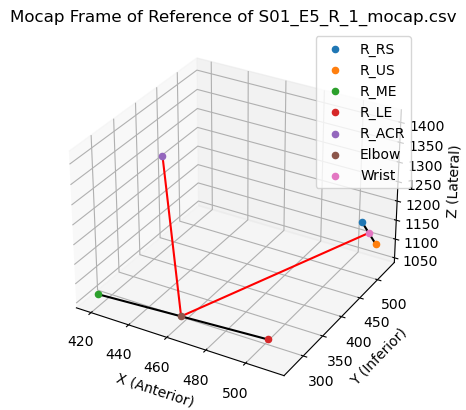

In [18]:
# Plot in mocap frame of reference
ax = plt.figure().add_subplot(projection='3d')

for point, label in zip([p_rs, p_us, p_me, p_le, p_acr], markers):
    x, y, z = point
    ax.scatter(x, y, zs=z, label=label)

# elbow midpoints
ax = plot_point(ax, p_elb, label='Elbow')
ax = plot_line(ax, np.vstack([p_le, p_me]))

# wrist midpoints
ax = plot_point(ax, p_wrist, label='Wrist')
ax = plot_line(ax, np.vstack([p_us, p_rs]))

# plot upper and lower arm
ax = plot_line(ax, np.vstack([p_acr, p_elb]), c='r')
ax = plot_line(ax, np.vstack([p_elb, p_wrist]), c='r')

ax.set_xlabel('X (Anterior)')
ax.set_ylabel('Y (Inferior)')
ax.set_zlabel('Z (Lateral)')

ax.set_title(f'Mocap Frame of Reference of {fp.name}')
ax.legend()

In [19]:
torso_p_rs = np.matmul(inv_T_torso, np.vstack([p_rs[:, None], [1]]))[:-1].squeeze()
torso_p_us = np.matmul(inv_T_torso, np.vstack([p_us[:, None], [1]]))[:-1].squeeze()
torso_p_me = np.matmul(inv_T_torso, np.vstack([p_me[:, None], [1]]))[:-1].squeeze()
torso_p_le = np.matmul(inv_T_torso, np.vstack([p_le[:, None], [1]]))[:-1].squeeze()
torso_p_acr = np.matmul(inv_T_torso, np.vstack([p_acr[:, None], [1]]))[:-1].squeeze()

torso_p_elb = np.matmul(inv_T_torso, np.vstack([p_elb[:, None], [1]]))[:-1].squeeze()
torso_p_wrist = np.matmul(inv_T_torso, np.vstack([p_wrist[:, None], [1]]))[:-1].squeeze()

torso_p_wrist

array([ 215.38877376, -248.34881847,  137.54367563])

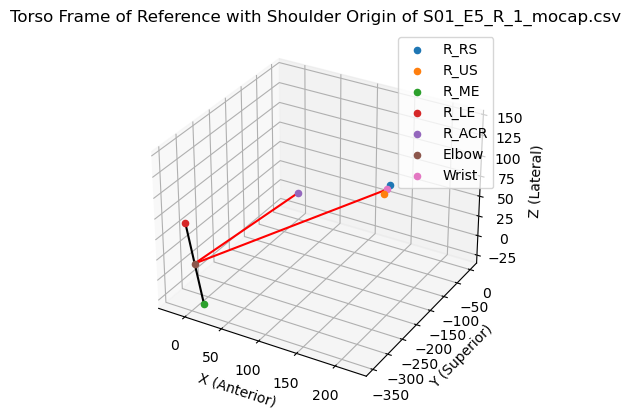

In [20]:
# plot in torso frame of reference with shoulder origin
ax = plt.figure().add_subplot(projection='3d')

for point, label in zip([torso_p_rs, torso_p_us, torso_p_me, torso_p_le, torso_p_acr, ], markers):
    x, y, z = point
    ax.scatter(x, y, zs=z, label=label)

# elbow midpoints
ax = plot_point(ax, torso_p_elb, label='Elbow')
ax = plot_line(ax, np.vstack([torso_p_le, torso_p_me]))

# wrist midpoints
ax = plot_point(ax, torso_p_wrist, label='Wrist')
ax = plot_line(ax, np.vstack([torso_p_us, torso_p_rs]))

# plot upper and lower arm
ax = plot_line(ax, np.vstack([torso_p_acr, torso_p_elb]), c='r')
ax = plot_line(ax, np.vstack([torso_p_elb, torso_p_wrist]), c='r')

ax.set_xlabel('X (Anterior)')
ax.set_ylabel('Y (Superior)')
ax.set_zlabel('Z (Lateral)')

ax.set_title(f'Torso Frame of Reference with Shoulder Origin of {fp.name}')
ax.legend()

# Generate Transformed Mocap Data

In [21]:
def load_df(fp):
    """Loads mocap data of interest and resamples to 50Hz
    """
    # Read the header of the file to get columns and frequency info
    with open(fp, 'r') as f:
        old_line = ""
        new_line = ""
        frequency = None
        for skip_lines, new_line in enumerate(f):
            if len(old_line.split(",")) > 5:
                break  # Stop when we encounter the first very long header row
            if old_line.lower().strip() == "trajectories":
                frequency = float(new_line.split(",")[0])  # Sometimes frequency has ",hz" on the same line and isnt the same for all captures
            old_line = new_line
    header = old_line.split(",")
    header_markers = [col.split(':')[-1] for col in header]
    # We need radial styloid (RS), ulnar styloid (US), medial epicondyle (ME), and lateral epicondyle (LE)
    # for computing forearm orientation and positions
    markers = ["R_RS", "R_US", "R_ME", "R_LE", "R_ACR", "C7", "T8"]
    col_names = [f"{marker}_{axis}" for marker, axis in itertools.product(markers, "XYZ")]
    col_inds = []
    for marker in markers:
        i = header_markers.index(marker)
        col_inds.extend([i, i+1, i+2])  

    # Sort by names by index, pandas usecols arg uses sorted column order
    col_inds, col_names = list(zip(*sorted(zip(col_inds, col_names))))

    df = pd.read_csv(fp, skiprows=skip_lines + 2, usecols=col_inds, names=col_names)
    df.index = pd.to_timedelta(df.index / frequency, unit="seconds")
    df = df.resample("0.02S").mean()  # Resample to 50 Hz
    return df

# test
fp = Path('E:/Datasets/0-Processed_Datasets/2023-11-15_imu-vicon-data/S01/S01_E2_R_1_mocap.csv')
df = load_df(fp)
df

,C7_X,C7_Y,C7_Z,T8_X,T8_Y,T8_Z,R_ACR_X,R_ACR_Y,R_ACR_Z,R_LE_X,...,R_LE_Z,R_ME_X,R_ME_Y,R_ME_Z,R_US_X,R_US_Y,R_US_Z,R_RS_X,R_RS_Y,R_RS_Z
0 days 00:00:00,786.8175,248.8325,1481.855,857.7985,281.4780,1231.415,607.1445,415.2885,1438.305,475.3295,...,1141.850,550.7500,402.6915,1102.985,381.2155,263.3500,936.1270,391.8705,214.8895,964.9830
0 days 00:00:00.020000,786.9155,249.0860,1481.875,857.9720,281.4455,1231.450,607.6235,415.9105,1438.005,475.3535,...,1141.880,550.7675,402.6525,1102.820,380.4150,263.7200,936.5655,390.9935,215.2700,965.4065
0 days 00:00:00.040000,787.1460,249.2695,1481.810,858.1965,281.3765,1231.445,608.2925,416.4730,1437.785,475.0225,...,1142.285,550.3085,402.7415,1102.895,378.6090,264.5000,937.5300,389.1820,216.0005,966.3040
0 days 00:00:00.060000,787.4755,249.3655,1481.695,858.4810,281.2795,1231.410,609.1650,416.9305,1437.595,474.3325,...,1143.125,549.4480,402.9580,1103.265,375.9560,265.6550,939.0465,386.4590,217.0910,967.7055
0 days 00:00:00.080000,787.8825,249.3710,1481.565,858.8075,281.1145,1231.345,610.2100,417.3165,1437.400,473.3165,...,1144.390,548.1885,403.3080,1103.940,372.4025,267.2380,941.1760,382.8685,218.6025,969.7005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0 days 00:00:40,784.1210,184.7295,1468.905,866.9730,233.6335,1230.210,752.5565,360.7910,1507.520,490.8245,...,1484.150,486.6595,483.5520,1397.500,231.5310,460.6370,1505.7600,238.7760,402.9315,1506.0400
0 days 00:00:40.020000,783.4130,185.6670,1469.565,866.8320,234.3255,1230.725,748.6510,362.9325,1507.030,486.3730,...,1471.090,485.4565,482.3060,1384.595,226.5615,460.4570,1483.3350,234.0060,402.8045,1484.6550
0 days 00:00:40.040000,782.8050,186.8540,1470.200,866.7235,235.0770,1231.325,744.6250,365.3015,1506.605,482.2355,...,1458.605,484.6340,481.1750,1372.145,222.2775,460.0460,1460.8300,229.8005,402.4855,1463.1900
0 days 00:00:40.060000,782.2550,188.1585,1470.665,866.5545,236.1835,1231.810,740.3745,367.5480,1506.230,478.3955,...,1446.485,484.1580,480.3655,1360.140,218.6610,459.2470,1438.0600,226.2850,401.7665,1441.4100


In [22]:
def get_Tmatrix(df):
    """Get the transformation matrix from the first datapoint of an exercise
    """
    df = df.dropna(axis=0)  # For stats, drop NA rows
    if len(df) == 0:
        raise ValueError("0 length dataframe")
    # get marker positions
    p_acr = df.loc[:, ["R_ACR_X", "R_ACR_Y", "R_ACR_Z"]].values[0]
    p_c7 = df.loc[:, ["C7_X", "C7_Y", "C7_Z"]].values[0]
    p_t8 = df.loc[:, ["T8_X", "T8_Y", "T8_Z"]].values[0]
    # get unit axis vectors
    u = p_t8 - p_c7
    u_hat = u / np.linalg.norm(u) # inferior direction
    v = p_acr - p_c7
    v_hat = v / np.linalg.norm(v) # lateral direction
    x = np.cross(v_hat, u_hat) # anterior direction
    x_hat = x / np.linalg.norm(x) # not orthogonal unit vectors, therefore calc x_hat (results in anterior)
    y_hat = -u_hat # negative direction (superior direction)
    z_hat = np.cross(x_hat, y_hat) # y_hat and x_hat are orthogonal
    # get rotation matrix
    R = np.vstack([
        x_hat,
        y_hat,
        z_hat
    ]).T
    # get transformation matrix
    T_torso = np.vstack([np.hstack([R, p_acr[:, None]]), [0, 0, 0, 1]])
    inv_T_torso = np.linalg.inv(T_torso)

    return inv_T_torso

# test
fp = Path('E:/Datasets/0-Processed_Datasets/2023-11-15_imu-vicon-data/S01/S01_E2_R_1_mocap.csv')
df = load_df(fp)
inv_T = get_Tmatrix(df)
inv_T

array([[-6.17904773e-01, -7.37954574e-01, -2.71324048e-01,
         1.07186827e+03],
       [-2.70564896e-01, -1.24437896e-01,  9.54625501e-01,
        -1.15709301e+03],
       [-7.38233248e-01,  6.63278416e-01, -1.22773833e-01,
         3.49348575e+02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [23]:
# test function 
def transform_data_test(df, inv_T):
    df = df.dropna(axis=0)  # For stats, drop NA rows
    if len(df) == 0:
        raise ValueError("0 length dataframe")
    # get marker positions
    p_rs = df.loc[:, ["R_RS_X", "R_RS_Y", "R_RS_Z"]].values
    p_us = df.loc[:, ["R_US_X", "R_US_Y", "R_US_Z"]].values
    p_me = df.loc[:, ["R_ME_X", "R_ME_Y", "R_ME_Z"]].values
    p_le = df.loc[:, ["R_LE_X", "R_LE_Y", "R_LE_Z"]].values
    p_acr = df.loc[:, ["R_ACR_X", "R_ACR_Y", "R_ACR_Z"]].values

    p_elb = (p_me + p_le)/2
    p_wrist = (p_us + p_rs)/2

    # transform coordinates
    for i in range(len(df)):
        p_rs[i] = np.matmul(inv_T, np.vstack([p_rs[i][:,None], [1]]))[:-1].squeeze()
        p_us[i] = np.matmul(inv_T, np.vstack([p_us[i][:,None], [1]]))[:-1].squeeze()
        p_me[i] = np.matmul(inv_T, np.vstack([p_me[i][:,None], [1]]))[:-1].squeeze()
        p_le[i] = np.matmul(inv_T, np.vstack([p_le[i][:,None], [1]]))[:-1].squeeze()
        p_acr[i] = np.matmul(inv_T, np.vstack([p_acr[i][:,None], [1]]))[:-1].squeeze()

        p_elb[i] = np.matmul(inv_T, np.vstack([p_elb[i][:,None], [1]]))[:-1].squeeze()
        p_wrist[i] = np.matmul(inv_T, np.vstack([p_wrist[i][:,None], [1]]))[:-1].squeeze()

    data = np.hstack((p_rs, p_us, p_me, p_le, p_acr, p_elb, p_wrist))
    df = pd.DataFrame(
        data, 
        # columns=["R_RS_X", "R_RS_Y", "R_RS_Z", "R_US_X", "R_US_Y", "R_US_Z", "R_ME_X", "R_ME_Y", "R_ME_Z", "R_LE_X", "R_LE_Y", "R_LE_Z", "R_ACR_X", "R_ACR_Y", "R_ACR_Z", "R_ELB_X", "R_ELB_Y", "R_ELB_Z", "R_WRIST_X", "R_WRIST_Y", "R_WRIST_Z"]
    )
    return df
    
def apply_transformation(positions, inv_T):
    positions_homogeneous = np.hstack([positions, np.ones((len(positions), 1))])
    transformed_positions = np.matmul(inv_T, positions_homogeneous.T).T[:, :-1]
    return transformed_positions

def transform_data(df, inv_T):
    df = df.dropna(axis=0)  # For stats, drop NA rows
    if len(df) == 0:
        raise ValueError("0 length dataframe")

    marker_columns = ["R_RS", "R_US", "R_ME", "R_LE", "R_ACR"]
    positions = []

    for marker in marker_columns:
        marker_positions = df.loc[:, [f"{marker}_{axis}" for axis in "XYZ"]].values
        positions.append(marker_positions)

    additional_positions = {
        "R_ELB": (positions[2] + positions[3]) / 2,
        "R_WRIST": (positions[1] + positions[0]) / 2
    }

    positions.extend(list(additional_positions.values()))

    # Apply transformation to all positions
    transformed_positions = [apply_transformation(pos, inv_T) for pos in positions]

    # Create a DataFrame with the transformed positions
    columns = [f"{marker}_{axis}" for marker in marker_columns + list(additional_positions.keys()) for axis in "XYZ"]
    transformed_df = pd.DataFrame(np.hstack(transformed_positions), columns=columns)

    return transformed_df

# test
fp = Path('E:/Datasets/0-Processed_Datasets/2023-11-15_imu-vicon-data/S01/S01_E9_R_1_mocap.csv')
df = load_df(fp)
inv_T = get_Tmatrix(df)
# test = transform_data_test(df, inv_T)
new_df = transform_data(df, inv_T)
new_df

,R_RS_X,R_RS_Y,R_RS_Z,R_US_X,R_US_Y,R_US_Z,R_ME_X,R_ME_Y,R_ME_Z,R_LE_X,...,R_LE_Z,R_ACR_X,R_ACR_Y,R_ACR_Z,R_ELB_X,R_ELB_Y,R_ELB_Z,R_WRIST_X,R_WRIST_Y,R_WRIST_Z
0,63.056033,-265.888808,446.212659,12.148983,-295.788796,449.080804,-3.344971,-268.206807,170.541799,-52.884441,...,211.461025,0.000000,-2.273737e-13,-5.684342e-14,-28.114706,-238.675243,191.001412,37.602508,-280.838802,447.646731
1,74.113074,-283.250912,437.178991,23.278220,-313.054531,440.494975,-1.075975,-275.713321,163.859315,-48.217601,...,208.210367,1.620560,-5.327141e-01,2.435859e+00,-24.646788,-246.600362,186.034841,48.695647,-298.152721,438.836983
2,84.188428,-299.908593,427.652743,33.694470,-330.117487,431.059855,1.625071,-282.595037,156.947542,-43.731331,...,204.740483,2.893460,-1.279002e+00,4.562881e+00,-21.053130,-254.062255,180.844012,58.941449,-315.013040,429.356299
3,93.888253,-315.814305,417.360943,43.489499,-346.203182,420.963245,3.588574,-288.673055,150.024056,-39.422438,...,201.066217,4.053840,-2.042662e+00,6.248130e+00,-17.916932,-260.687601,175.545136,68.688876,-331.008743,419.162094
4,103.003063,-330.758312,406.613293,52.547733,-360.979543,410.544823,5.041429,-293.989020,143.173660,-35.368820,...,197.205355,5.197365,-2.691065e+00,7.906407e+00,-15.163695,-266.548240,170.189508,77.775398,-345.868927,408.579058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2358,-103.206422,101.521190,435.189318,-158.349062,79.255090,433.467646,-71.056764,-73.173839,213.997791,-125.175398,...,190.810998,4.319086,3.724702e+01,-5.703606e+01,-98.116081,-41.551229,202.404395,-130.777742,90.388140,434.328482
2359,-97.387476,84.877598,441.093804,-152.364073,62.211312,439.483454,-66.952424,-83.004598,214.525012,-121.846582,...,193.856129,4.404772,3.590493e+01,-5.447083e+01,-94.399503,-51.275785,204.190570,-124.875775,73.544455,440.288629
2360,-91.324893,67.613198,446.790017,-146.044324,44.374652,445.295044,-62.408027,-93.328699,215.138217,-118.329411,...,197.058776,4.445031,3.424925e+01,-5.157629e+01,-90.368719,-61.653695,206.098497,-118.684609,55.993925,446.042530
2361,-85.092023,49.780771,452.274101,-139.428625,25.659796,450.936787,-57.416363,-103.993406,215.742144,-114.541533,...,200.295944,4.520549,3.226455e+01,-4.840498e+01,-85.978948,-72.507708,208.019044,-112.260324,37.720284,451.605444


Note: The first position of the shoulder (ACR) is ~(0,0,0) as we transformed the data using the first element of data and set the shoulder as the origin -> sanity check

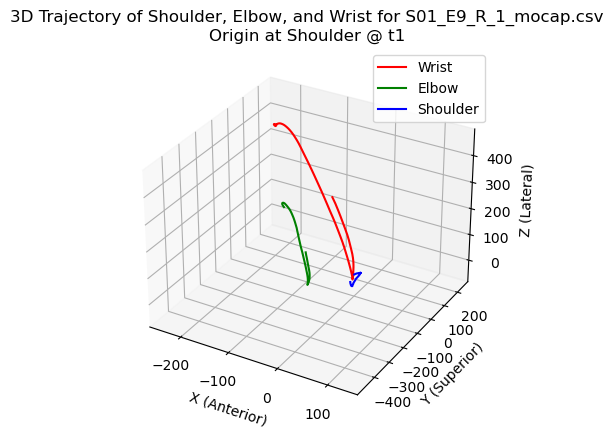

In [24]:
# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x_wrist = new_df['R_WRIST_X']
y_wrist = new_df['R_WRIST_Y']
z_wrist = new_df['R_WRIST_Z']

x_elbow = new_df['R_ELB_X']
y_elbow = new_df['R_ELB_Y']
z_elbow = new_df['R_ELB_Z']

x_acr = new_df['R_ACR_X']
y_acr = new_df['R_ACR_Y']
z_acr = new_df['R_ACR_Z']

# Plot the points
ax.plot(x_wrist[:100], y_wrist[:100], z_wrist[:100], label='Wrist', c='r')
ax.plot(x_elbow[:100], y_elbow[:100], z_elbow[:100], label='Elbow', c='g')
ax.plot(x_acr[:100], y_acr[:100], z_acr[:100], label='Shoulder', c='b')

# Set labels for each axis
ax.set_xlabel('X (Anterior)')
ax.set_ylabel('Y (Superior)')
ax.set_zlabel('Z (Lateral)')

ax.set_title(f'3D Trajectory of Shoulder, Elbow, and Wrist for {fp.name}\nOrigin at Shoulder @ t1')
ax.legend()
plt.show()

In [25]:
# convert mocap position 
missing = []
for file in tqdm(mocap_files):
    try:
        df = load_df(file)
        
        parent = file.parent
        filename = file.name
        # create save path
        save_path = Path(f'{parent}')
        save_path.mkdir(parents=True, exist_ok=True)
        
        inv_T = get_Tmatrix(df)
        df_tfm = transform_data(df, inv_T)
        df_tfm.to_csv(Path(f'{save_path}/{filename.split(".")[0]}_tfm.csv'), index=False)
    except Exception as e:
        print(f"Error with {file}")
        missing.append({file: e})
        continue

print(f'Number of files with missing data: {len(missing)}')

 15%|█▍        | 183/1252 [00:19<01:31, 11.69it/s]

Error with E:\Datasets\0-Processed_Datasets\2023-11-15_imu-vicon-data\S11\S11_E1_R_2_mocap.csv


 20%|██        | 256/1252 [00:27<01:12, 13.74it/s]

Error with E:\Datasets\0-Processed_Datasets\2023-11-15_imu-vicon-data\S15\S15_E1_R_2_mocap.csv


 21%|██        | 260/1252 [00:28<01:05, 15.15it/s]

Error with E:\Datasets\0-Processed_Datasets\2023-11-15_imu-vicon-data\S15\S15_E3_R_2_mocap.csv
Error with E:\Datasets\0-Processed_Datasets\2023-11-15_imu-vicon-data\S15\S15_E4_R_2_mocap.csv


 33%|███▎      | 418/1252 [00:53<02:15,  6.13it/s]

Error with E:\Datasets\0-Processed_Datasets\2023-11-15_imu-vicon-data\S25\S25_E6_R_1_mocap.csv


 34%|███▎      | 422/1252 [00:53<01:31,  9.08it/s]

Error with E:\Datasets\0-Processed_Datasets\2023-11-15_imu-vicon-data\S25\S25_E9_R_1_mocap.csv


 37%|███▋      | 457/1252 [00:56<00:55, 14.40it/s]

Error with E:\Datasets\0-Processed_Datasets\2023-11-15_imu-vicon-data\S27\S27_E9_R_1_mocap.csv
Error with E:\Datasets\0-Processed_Datasets\2023-11-15_imu-vicon-data\S27\S27_E9_R_2_mocap.csv


 47%|████▋     | 592/1252 [01:16<01:00, 10.93it/s]

Error with E:\Datasets\0-Processed_Datasets\2023-11-15_imu-vicon-data\S35\S35_E9_R_2_mocap.csv


 49%|████▉     | 617/1252 [01:18<00:42, 14.79it/s]

Error with E:\Datasets\0-Processed_Datasets\2023-11-15_imu-vicon-data\S37\S37_E9_R_1_mocap.csv


 51%|█████     | 634/1252 [01:19<00:43, 14.37it/s]

Error with E:\Datasets\0-Processed_Datasets\2023-11-15_imu-vicon-data\S38\S38_E9_R_1_mocap.csv
Error with E:\Datasets\0-Processed_Datasets\2023-11-15_imu-vicon-data\S38\S38_E9_R_2_mocap.csv


 59%|█████▉    | 742/1252 [01:33<00:41, 12.40it/s]

Error with E:\Datasets\0-Processed_Datasets\2023-11-15_imu-vicon-data\S44\S44_E9_R_1_mocap.csv
Error with E:\Datasets\0-Processed_Datasets\2023-11-15_imu-vicon-data\S44\S44_E9_R_2_mocap.csv


 61%|██████    | 763/1252 [01:35<00:34, 14.19it/s]

Error with E:\Datasets\0-Processed_Datasets\2023-11-15_imu-vicon-data\S46\S46_E2_R_1_mocap.csv


 62%|██████▏   | 782/1252 [01:37<00:40, 11.51it/s]

Error with E:\Datasets\0-Processed_Datasets\2023-11-15_imu-vicon-data\S47\S47_E2_R_1_mocap.csv
Error with E:\Datasets\0-Processed_Datasets\2023-11-15_imu-vicon-data\S47\S47_E2_R_2_mocap.csv
Error with E:\Datasets\0-Processed_Datasets\2023-11-15_imu-vicon-data\S47\S47_E3_R_1_mocap.csv
Error with E:\Datasets\0-Processed_Datasets\2023-11-15_imu-vicon-data\S47\S47_E3_R_2_mocap.csv


 63%|██████▎   | 788/1252 [01:37<00:27, 16.86it/s]

Error with E:\Datasets\0-Processed_Datasets\2023-11-15_imu-vicon-data\S47\S47_E4_R_1_mocap.csv
Error with E:\Datasets\0-Processed_Datasets\2023-11-15_imu-vicon-data\S47\S47_E4_R_2_mocap.csv
Error with E:\Datasets\0-Processed_Datasets\2023-11-15_imu-vicon-data\S47\S47_E5_R_1_mocap.csv
Error with E:\Datasets\0-Processed_Datasets\2023-11-15_imu-vicon-data\S47\S47_E5_R_2_mocap.csv
Error with E:\Datasets\0-Processed_Datasets\2023-11-15_imu-vicon-data\S47\S47_E6_R_1_mocap.csv
Error with E:\Datasets\0-Processed_Datasets\2023-11-15_imu-vicon-data\S47\S47_E6_R_2_mocap.csv
Error with E:\Datasets\0-Processed_Datasets\2023-11-15_imu-vicon-data\S47\S47_E7_R_1_mocap.csv


 63%|██████▎   | 795/1252 [01:37<00:20, 22.27it/s]

Error with E:\Datasets\0-Processed_Datasets\2023-11-15_imu-vicon-data\S47\S47_E7_R_2_mocap.csv
Error with E:\Datasets\0-Processed_Datasets\2023-11-15_imu-vicon-data\S47\S47_E8_R_1_mocap.csv
Error with E:\Datasets\0-Processed_Datasets\2023-11-15_imu-vicon-data\S47\S47_E8_R_2_mocap.csv
Error with E:\Datasets\0-Processed_Datasets\2023-11-15_imu-vicon-data\S47\S47_E9_R_1_mocap.csv
Error with E:\Datasets\0-Processed_Datasets\2023-11-15_imu-vicon-data\S47\S47_E9_R_2_mocap.csv


 71%|███████   | 886/1252 [01:48<00:29, 12.53it/s]

Error with E:\Datasets\0-Processed_Datasets\2023-11-15_imu-vicon-data\S52\S52_E9_R_2_mocap.csv


100%|██████████| 1252/1252 [02:38<00:00,  7.89it/s]

Number of files with missing data: 32
